In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose 
import warnings
import math
from datetime import timedelta
warnings.filterwarnings('ignore')

In [2]:
cols = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]

In [3]:
data = pd.read_csv('pharma/salesmonthly.csv',parse_dates=['datum'],index_col='datum')

In [4]:
data['Year'] = pd.DatetimeIndex(data.index).year

In [5]:
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year
datum,,,,,,,,,
2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,2014
2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2014
2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,2014
2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2014
2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,2014


In [6]:
data.shape

(70, 9)

In [8]:
def plot_graph(data,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(data[col])
        plt.title(col)
        

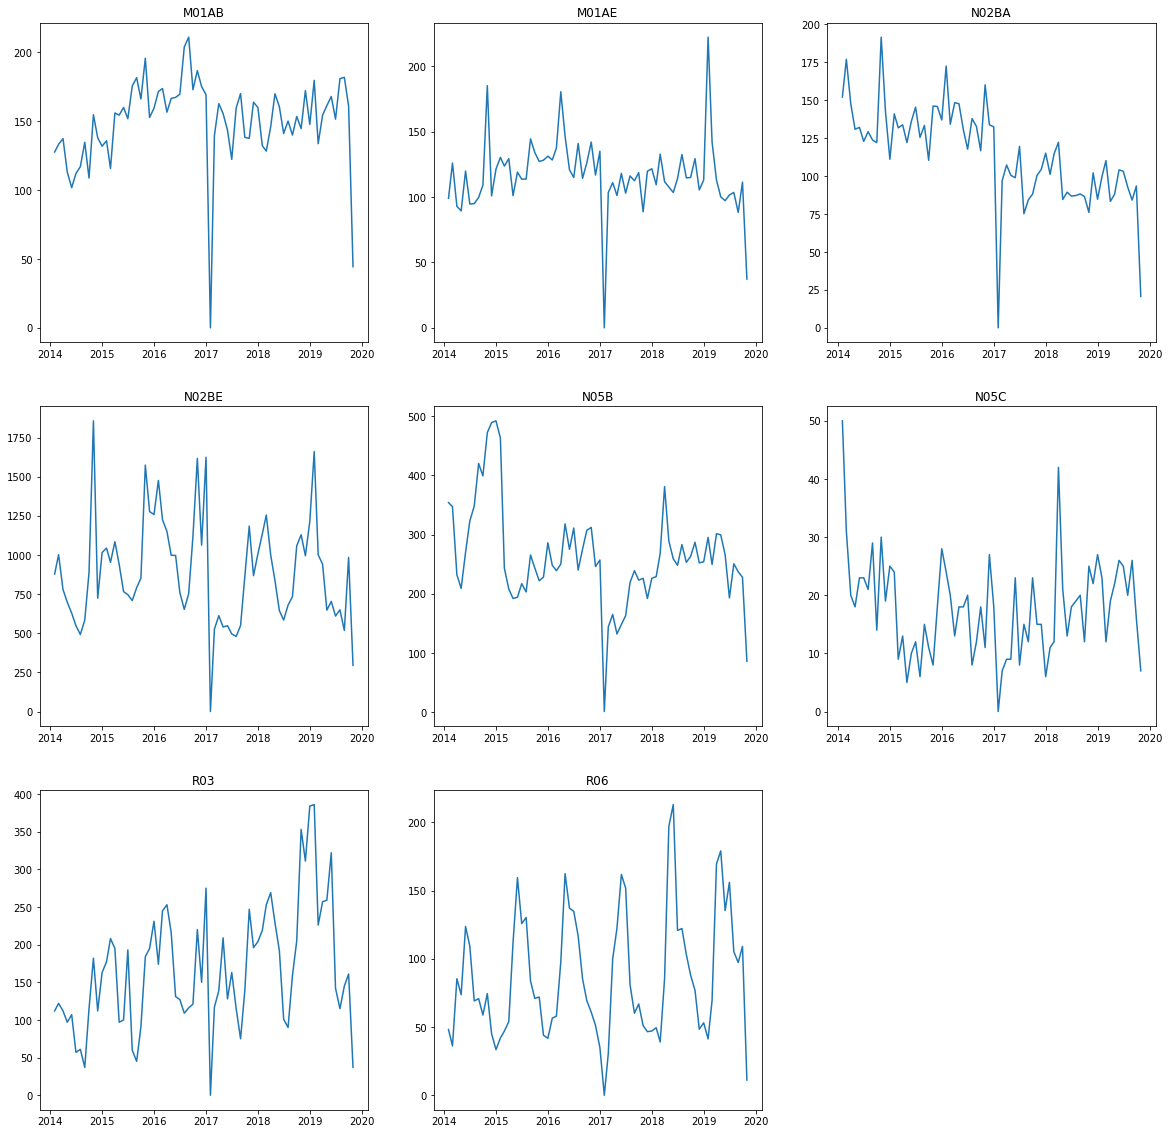

In [7]:
plot_graph(data,cols)

## ADF Test

In [9]:
for col in cols:
    print(col)
    X = data[col]
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if(result[1] <= 0.05):
        print('\tReject Null Hypothesis : Stationary\n')
    else :
        print('\tAccept Null Hypothesis : Non-Stationary\n')

M01AB
ADF Statistic: -5.367075
p-value: 0.000004
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
	Reject Null Hypothesis : Stationary

M01AE
ADF Statistic: -6.578427
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
	Reject Null Hypothesis : Stationary

N02BA
ADF Statistic: -2.795159
p-value: 0.058969
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
	Accept Null Hypothesis : Non-Stationary

N02BE
ADF Statistic: -3.593004
p-value: 0.005896
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
	Reject Null Hypothesis : Stationary

N05B
ADF Statistic: -3.039596
p-value: 0.031358
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
	Reject Null Hypothesis : Stationary

N05C
ADF Statistic: -6.767654
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
	Reject Null Hypothesis : Stationary

R03
ADF Statistic: -4.019376
p-value: 0.001312
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
	Reject Null Hypothesis : Stationary

R06
ADF Stati

### DIfferencing

In [86]:
diff = pd.read_csv('pharma/salesmonthly.csv',parse_dates=['datum'],index_col='datum')

In [87]:
diff['N02BA'] = diff['N02BA'].diff()
diff['R06'] = diff['R06'].diff()

In [6]:
for col in cols:
    print(col)
    X = df[col]
    result = adfuller(X.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

M01AB
ADF Statistic: -5.367075
p-value: 0.000004
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
M01AE
ADF Statistic: -6.578427
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
N02BA
ADF Statistic: -5.409856
p-value: 0.000003
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
N02BE
ADF Statistic: -3.593004
p-value: 0.005896
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
N05B
ADF Statistic: -3.039596
p-value: 0.031358
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
N05C
ADF Statistic: -6.767654
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
R03
ADF Statistic: -4.019376
p-value: 0.001312
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
R06
ADF Statistic: -4.935569
p-value: 0.000030
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


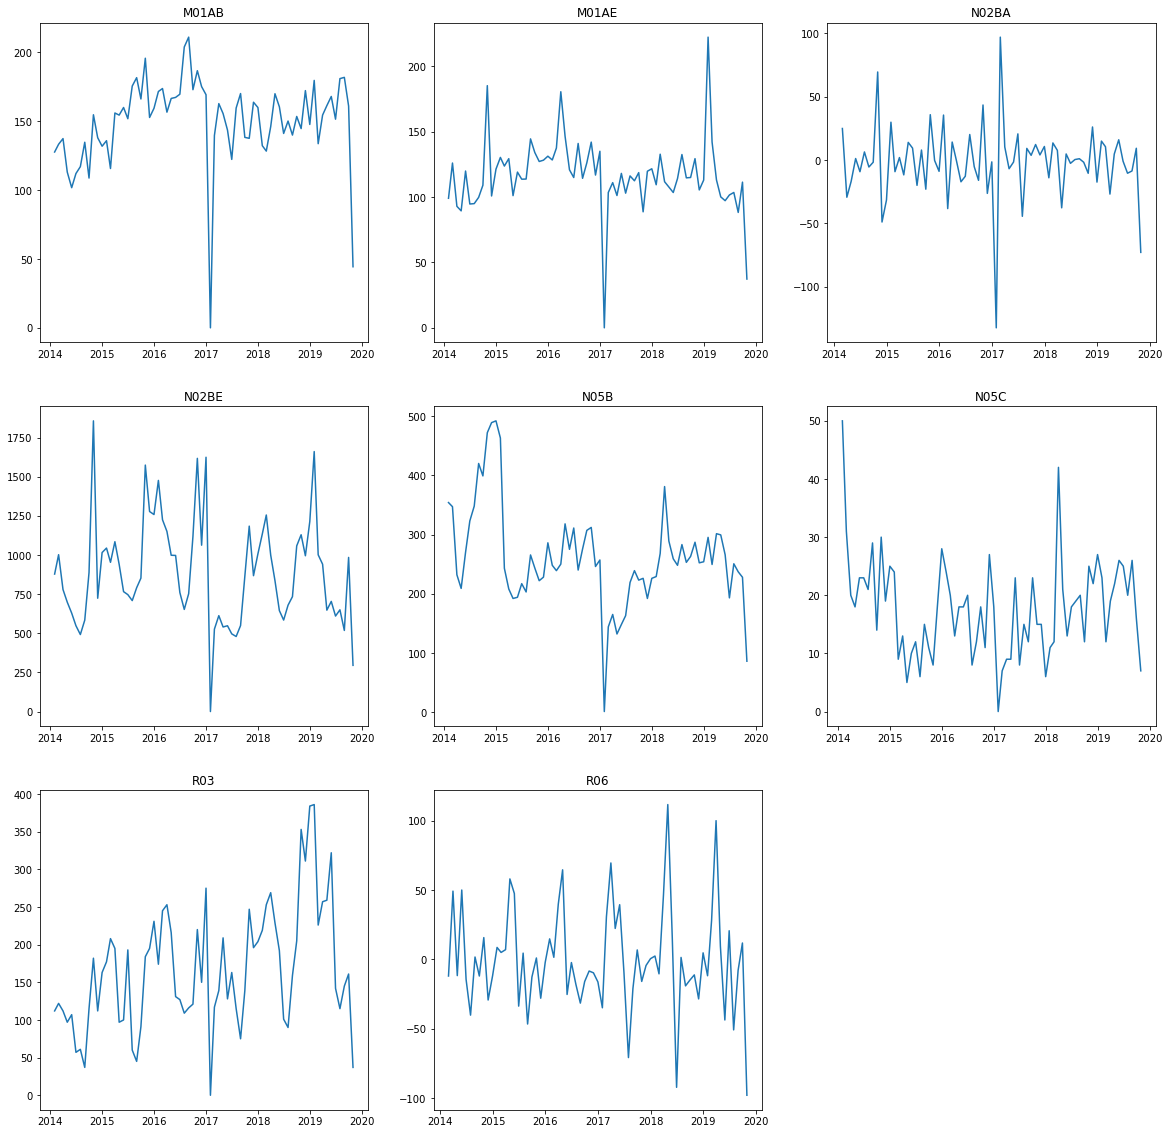

In [9]:
plot_graph(df,cols)

## Seasonal Decompose

In [175]:
def seasonal_graph(data,col):
    decompose_result = seasonal_decompose(data[col],model='additive')
    decompose_result.plot()
    plt.title(col)  

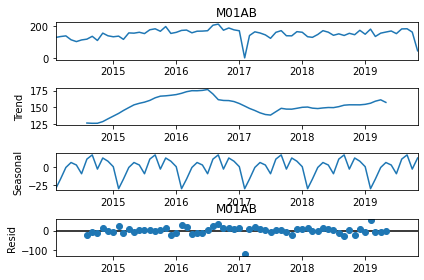

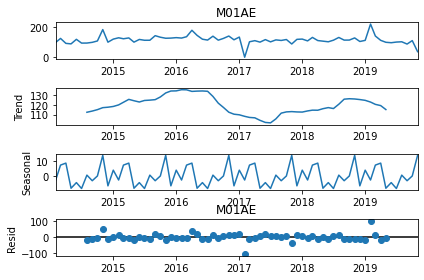

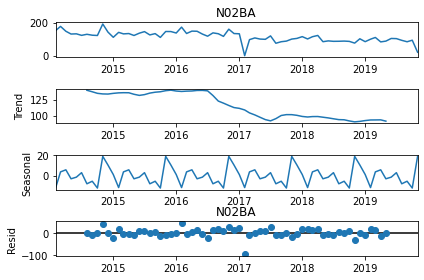

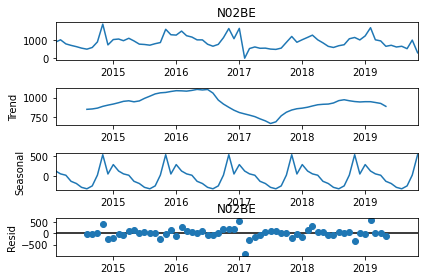

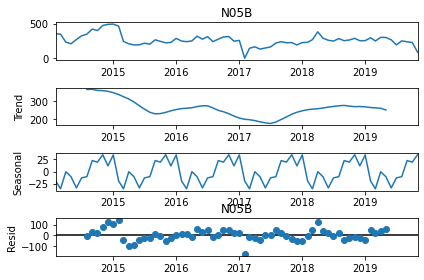

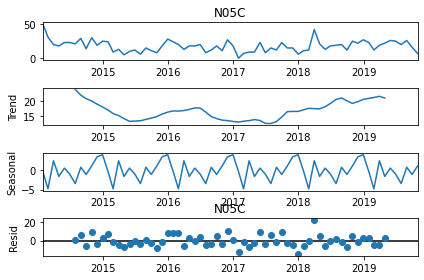

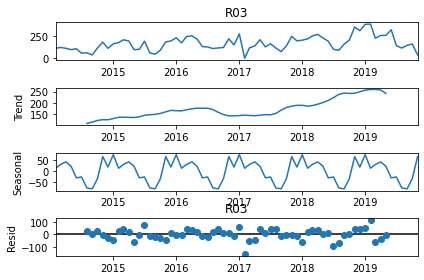

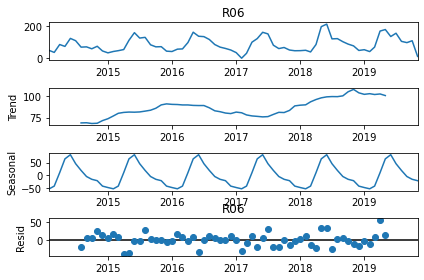

In [176]:
for col in cols:
    seasonal_graph(data,col)

### M01AB

<Figure size 3600x3600 with 0 Axes>

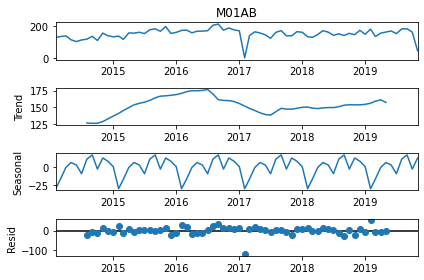

In [161]:
fig = plt.figure(figsize=(50,50))
decompose_result = seasonal_decompose(data["M01AB"],model='additive')
decompose_result.plot();

In [75]:
df = data.loc[:,['M01AB']]
train = df[:-6]
test = df[-6:]

In [55]:
test

,M01AB
datum,
2019-05-31,168.04
2019-06-30,151.54
2019-07-31,181.00
2019-08-31,181.91
2019-09-30,161.07
2019-10-31,44.37


In [117]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred

In [118]:
predictions = pd.DataFrame(predict,index=test.index)

In [71]:

predictions

,0
datum,
2019-05-31,155.871159
2019-06-30,151.583873
2019-07-31,173.413087
2019-08-31,181.579729
2019-09-30,162.058758
2019-10-31,177.773833


In [53]:
predict[0][-1]

155.87115870494543

In [28]:
test

,M01AB
datum,
2019-05-31,168.04
2019-06-30,151.54
2019-07-31,181.00
2019-08-31,181.91
2019-09-30,161.07
2019-10-31,44.37


### Exponential Smoothing

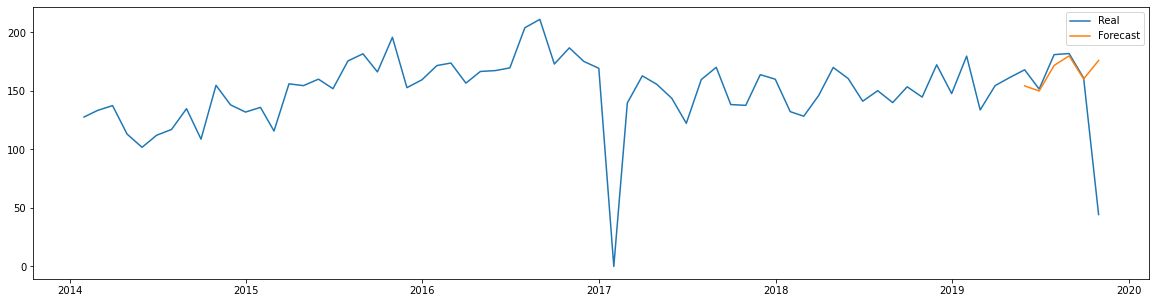

In [119]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [120]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

54.16009607842825


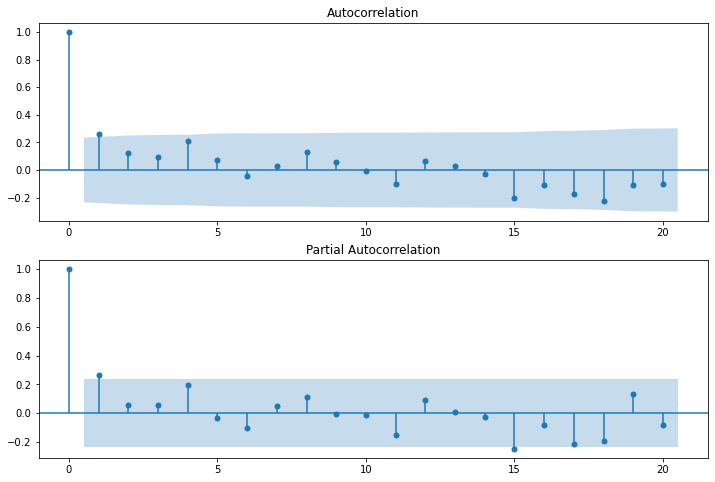

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["M01AB"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["M01AB"],lags=20,ax=ax2)

##### p = 0 , 1 ; q = 0, 1

In [43]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,0))
    model = model.fit()
    
    pred = model.predict(start = start,end = end-1,typ='levels')
    
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
    
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  M01AB   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                -325.627
Method:                       css-mle   S.D. of innovations             27.098
Date:                Mon, 24 May 2021   AIC                            657.255
Time:                        20:27:56   BIC                            663.957
Sample:                    01-31-2014   HQIC                           659.914
                         - 09-30-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         151.4211      4.852     31.207      0.000     141.911     160.931
ar.L1.M01AB     0.3324      0.113      2.940      0.003       0.111       0.554
                                    Roots       

### ARIMA 

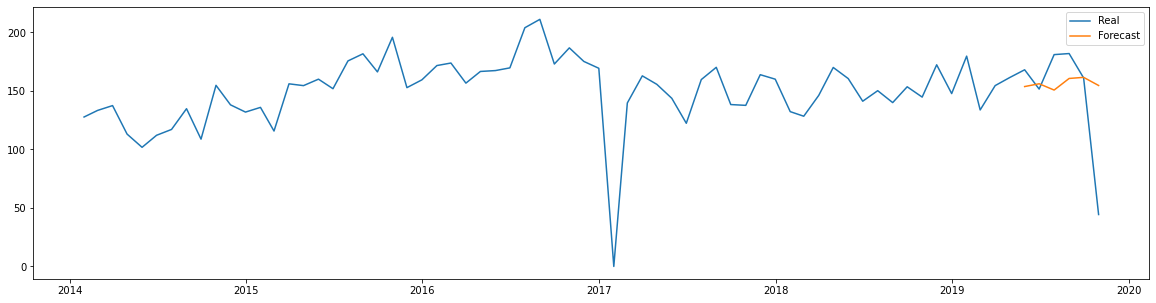

In [44]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [45]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

47.878341841303104


In [74]:
stepwise_fit = auto_arima(data['M01AB'],trace = True,suppress_warnings=True,start_p=0,max_p=1,start_q=0,max_q=1,test='adf')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=693.984, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=687.487, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=676.262, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=692.062, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=674.329, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=674.968, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=685.556, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.201 seconds


In [76]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(0,1,1))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(0,1,1))
    model = model.fit()
    
    pred = model.predict(start = start,end = end-1,typ='levels')
    
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
    
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                             ARIMA Model Results                              
Dep. Variable:                D.M01AB   No. Observations:                   68
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -321.988
Method:                       css-mle   S.D. of innovations             27.370
Date:                Thu, 27 May 2021   AIC                            649.975
Time:                        09:20:44   BIC                            656.634
Sample:                    02-28-2014   HQIC                           652.613
                         - 09-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6368      0.792      0.804      0.422      -0.916       2.190
ma.L1.D.M01AB    -0.7737      0.089     -8.659      0.000      -0.949      -0.599
                                    Root

### Auto ARIMA

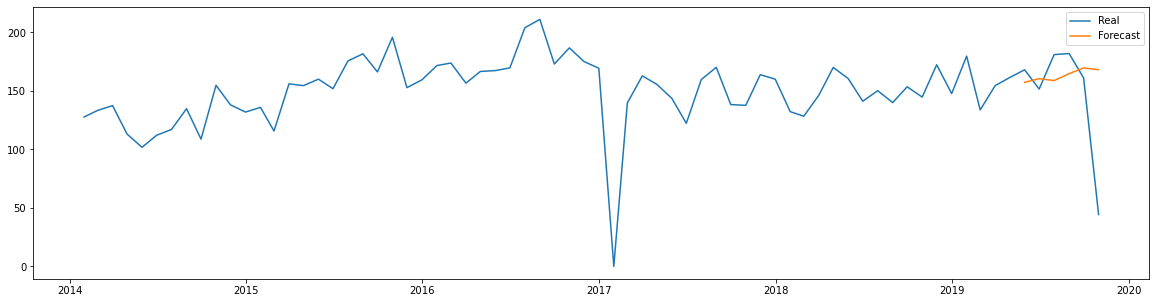

In [77]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [15]:
stepwise_fit = auto_arima(data['M01AB'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf',d=None,seasonal=True,max_P=2,max_D=1,max_Q=2,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=695.360, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=693.984, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=688.589, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=677.101, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=692.062, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=676.262, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=677.236, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=678.891, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=676.852, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=687.487, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=678.825, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=674.329, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=675.294, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12]             

In [30]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

### SARIMAX

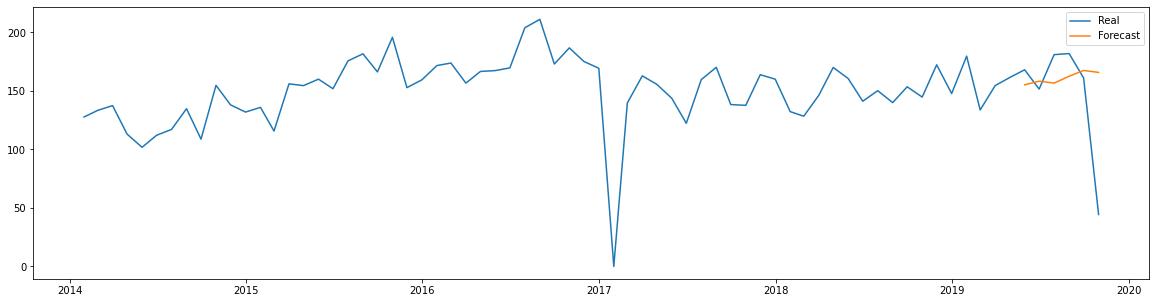

In [31]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [32]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

51.58644985414194


## M1A0E

<Figure size 3600x3600 with 0 Axes>

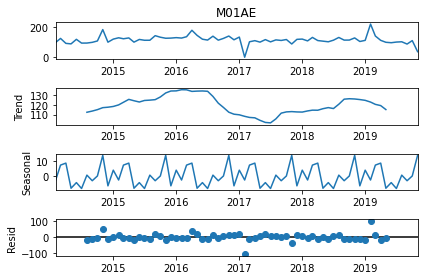

In [50]:
fig = plt.figure(figsize=(50,50))
decompose_result = seasonal_decompose(data["M01AE"],model='additive')
decompose_result.plot();

In [5]:
df = data.loc[:,['M01AE']]
train = df[:-6]
test = df[-6:]

In [7]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred

In [8]:
predictions = pd.DataFrame(predict,index=test.index)

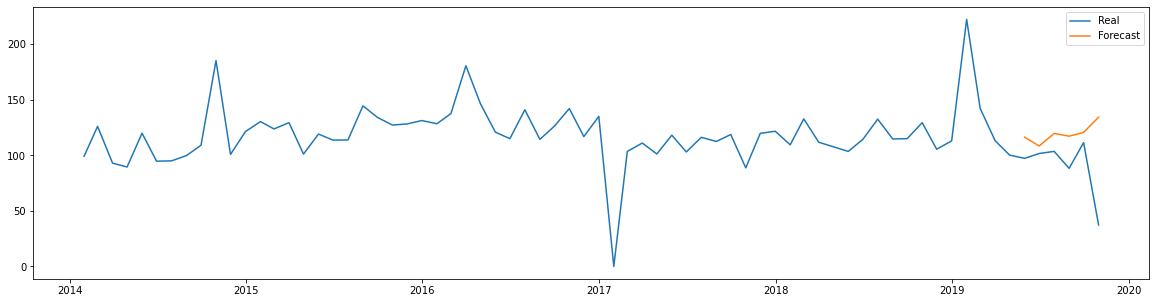

In [9]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [10]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

42.83738235624756


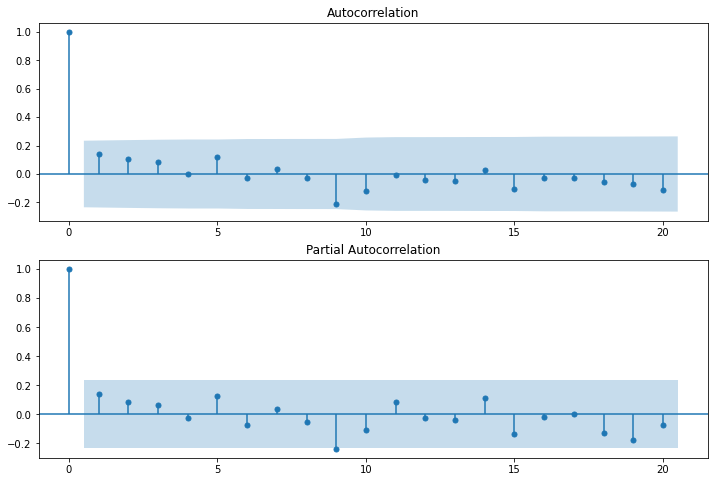

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["M01AE"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["M01AE"],lags=20,ax=ax2)

##### p = 0;q = 0

In [27]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(0,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(0,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  M01AE   No. Observations:                   69
Model:                     ARMA(0, 0)   Log Likelihood                -323.200
Method:                           css   S.D. of innovations             26.183
Date:                Mon, 24 May 2021   AIC                            650.399
Time:                        19:09:14   BIC                            654.868
Sample:                    01-31-2014   HQIC                           652.172
                         - 09-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.6623      3.152     37.328      0.000     111.484     123.840


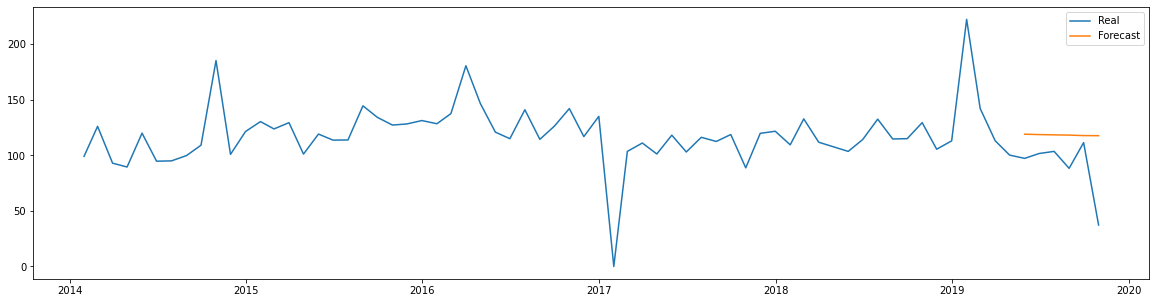

In [28]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [29]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

37.368615609892665


In [73]:
stepwise_fit = auto_arima(data['M01AE'],trace = True,suppress_warnings=True,start_p=0,max_p=1,start_q=0,max_q=1,test='adf',d=0)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=667.598, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=668.093, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=668.331, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=870.619, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=669.200, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.229 seconds


In [51]:
stepwise_fit = auto_arima(data['M01AE'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf',d=None,seasonal=True,max_P=2,max_D=1,max_Q=2,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=691.599, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=679.413, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=665.689, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=689.643, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=663.903, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=665.856, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=665.815, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=677.426, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=661.985, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=663.942, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=663.79

In [131]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

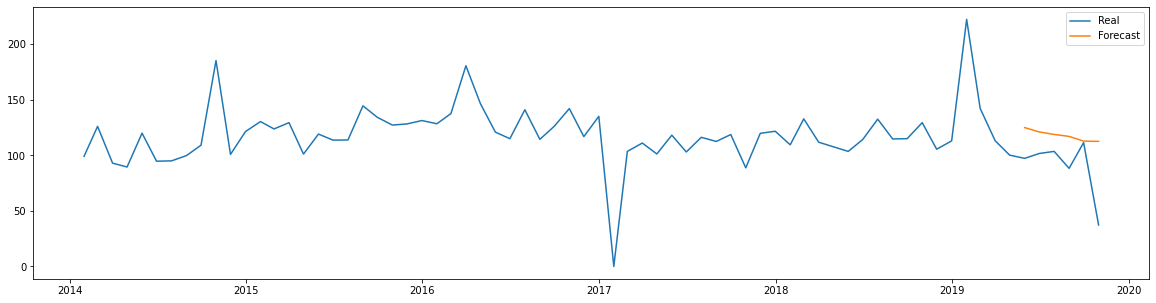

In [132]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [133]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

36.212983161330285


## N02BA

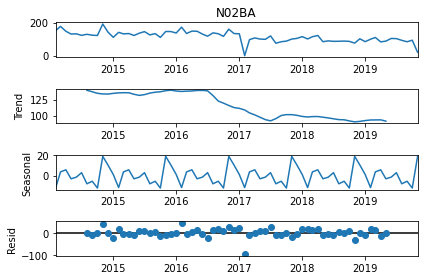

In [126]:

decompose_result = seasonal_decompose(data["N02BA"],model='additive')
decompose_result.plot();

In [13]:
df = data.loc[:,['N02BA']]
train = df[:-6]
test = df[-6:]

In [14]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred

In [15]:
predictions = pd.DataFrame(predict,index=test.index)

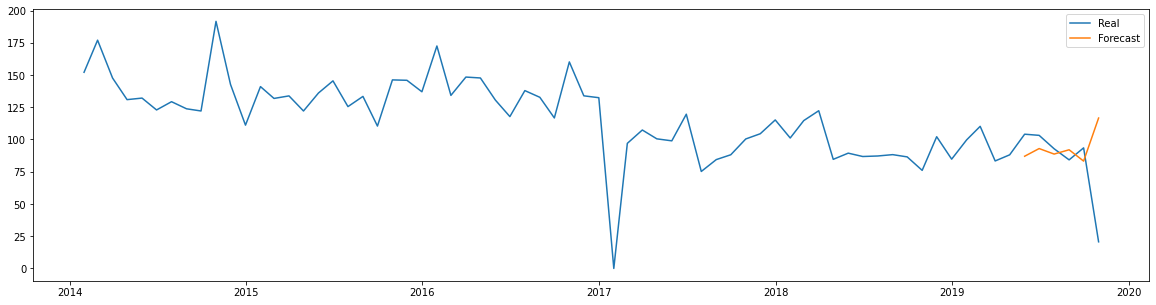

In [16]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [17]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

40.39647361789429


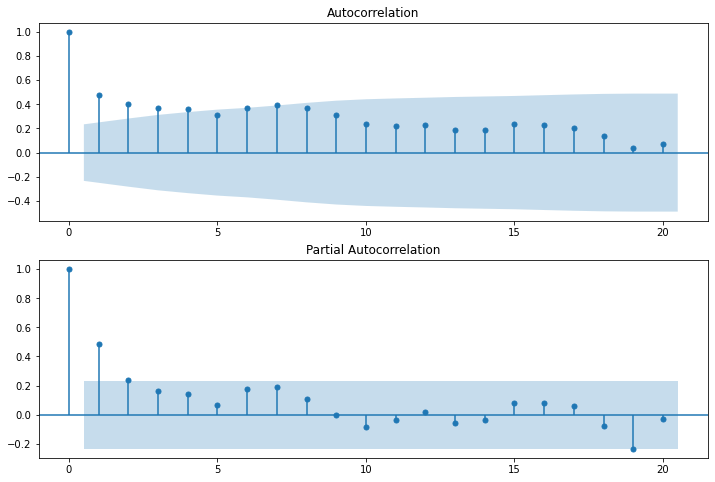

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N02BA"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N02BA"],lags=20,ax=ax2)

##### p = 0,1,2  ; q = 0,1,2,3,4

In [102]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(2,1,0))

for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(2,1,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                             ARIMA Model Results                              
Dep. Variable:                D.N02BA   No. Observations:                   68
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -313.829
Method:                       css-mle   S.D. of innovations             24.369
Date:                Mon, 24 May 2021   AIC                            635.658
Time:                        20:58:29   BIC                            644.536
Sample:                    02-28-2014   HQIC                           639.176
                         - 09-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0239      1.605     -0.638      0.523      -4.169       2.121
ar.L1.D.N02BA    -0.5626      0.115     -4.885      0.000      -0.788      -0.337
ar.L2.D.N02BA    -0.2964      0.115     

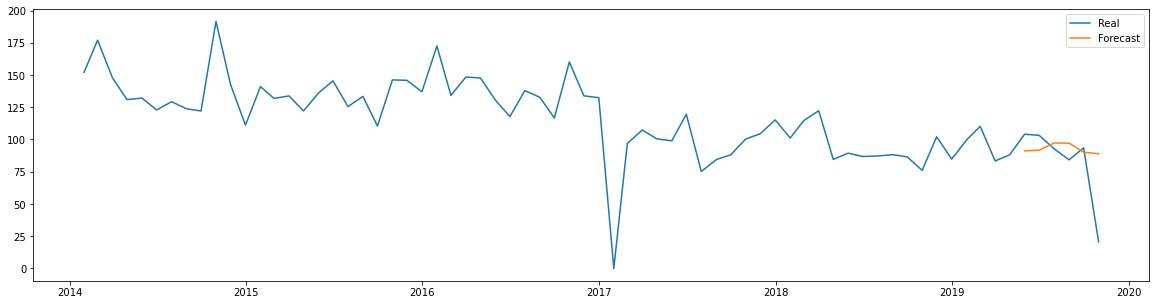

In [103]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [104]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

29.323849941110723


In [52]:
stepwise_fit = auto_arima(data['N02BA'],trace = True,suppress_warnings=True,start_p=0,max_p=3,start_q=0,max_q=5,test='adf',seasonal=True,max_P=3,max_D=1,max_Q=5,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=666.882, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=656.883, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=665.169, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=654.889, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=656.883, Time=0.07 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=651.292, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=653.071, Time=0.11 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=653.069, Time=0.09 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=650.418, Time=0.07 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=651.862, Time=0.22 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=651.85

In [107]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

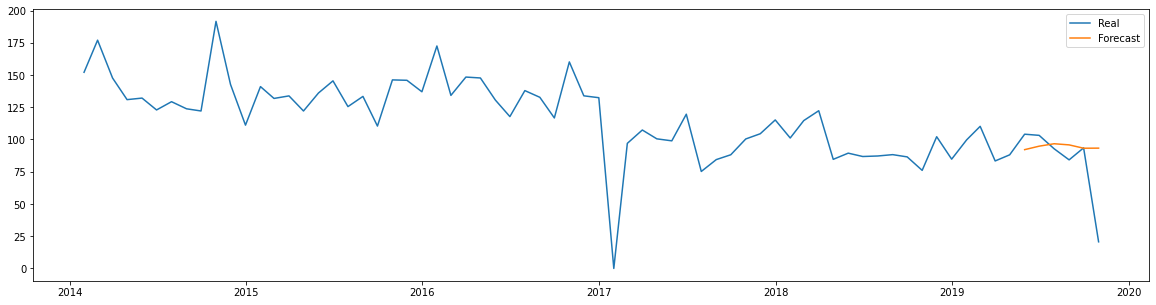

In [108]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [109]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

30.659764193109577


## N02BE 

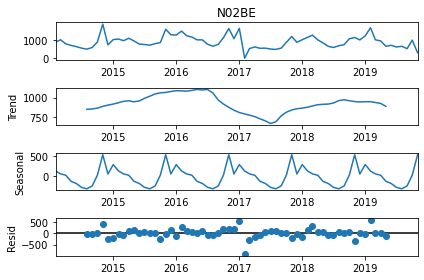

In [85]:
decompose_result = seasonal_decompose(data["N02BE"],model='additive')
decompose_result.plot();

In [129]:
df = data.loc[:,['N02BE']]
train = df[:-6]
test = df[-6:]

In [137]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred

In [138]:
predictions = pd.DataFrame(predict,index=test.index)

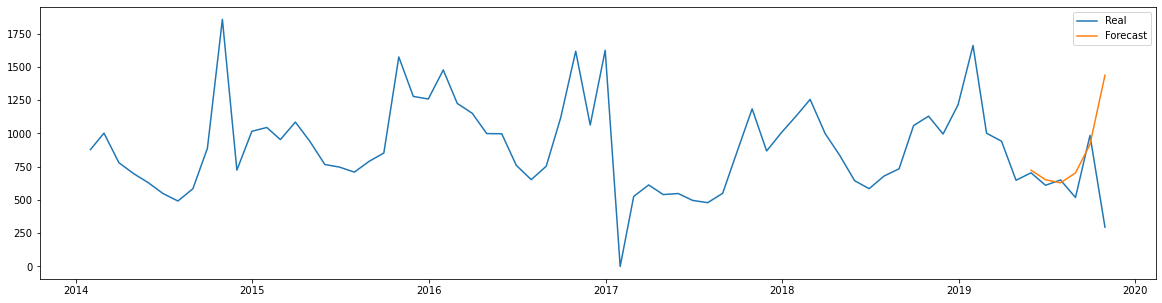

In [139]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [140]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

473.47410252518625


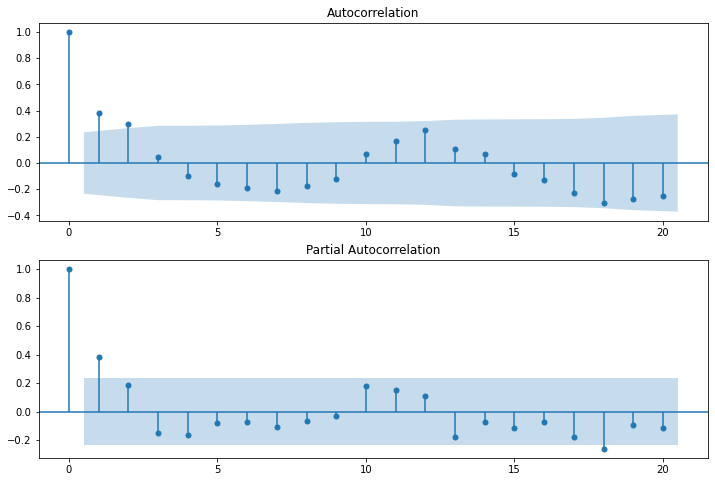

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N02BE"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N02BE"],lags=20,ax=ax2)

##### p = 0, 1 ; q = 0, 1, 2 

In [130]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                  N02BE   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                -492.176
Method:                       css-mle   S.D. of innovations            302.715
Date:                Mon, 24 May 2021   AIC                            990.352
Time:                        21:38:12   BIC                            997.055
Sample:                    01-31-2014   HQIC                           993.011
                         - 09-30-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         901.7680     60.065     15.013      0.000     784.043    1019.493
ar.L1.N02BE     0.3990      0.109      3.658      0.000       0.185       0.613
                                    Roots       

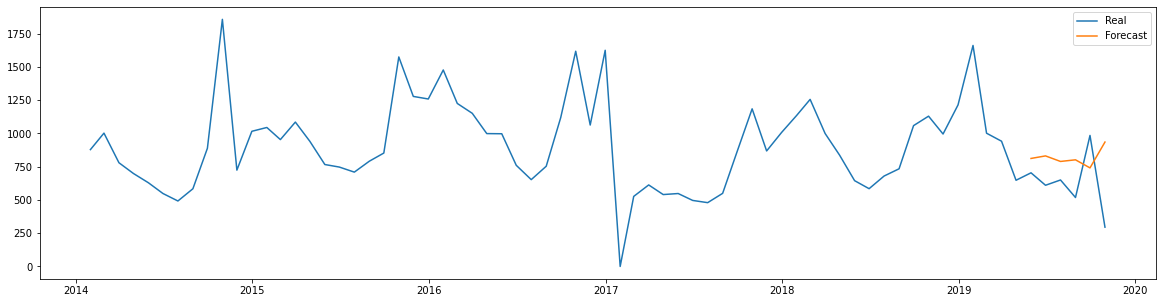

In [131]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [132]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

323.66347800219626


In [5]:
stepwise_fit = auto_arima(data['N02BE'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1010.919, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1017.220, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1005.517, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1010.048, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1161.120, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1007.943, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1006.565, Time=0.38 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1008.283, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1006.478, Time=0.07 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1009.177, Time=0.34 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1018.676, Time=0.02 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1005.872, Time=0.12 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1007.962, Time=0.15 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1008.876, Time=0.16 sec
 ARIMA(2,0,1)(1,0,0

In [100]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

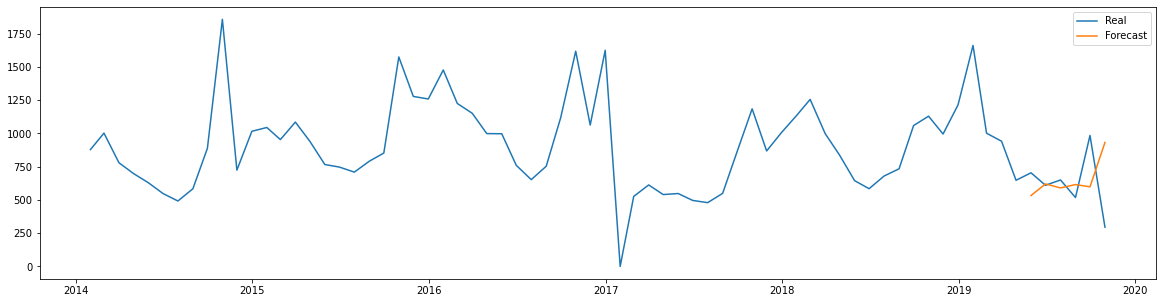

In [101]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [102]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

315.39772500517313


## N05B

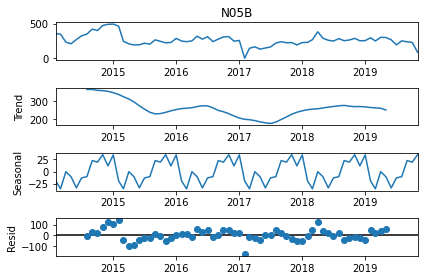

In [93]:
decompose_result = seasonal_decompose(data["N05B"],model='additive')
decompose_result.plot();

In [7]:
df = data.loc[:,['N05B']]
train = df[:-6]
test = df[-6:]

In [142]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred

In [143]:
predictions = pd.DataFrame(predict,index=test.index)

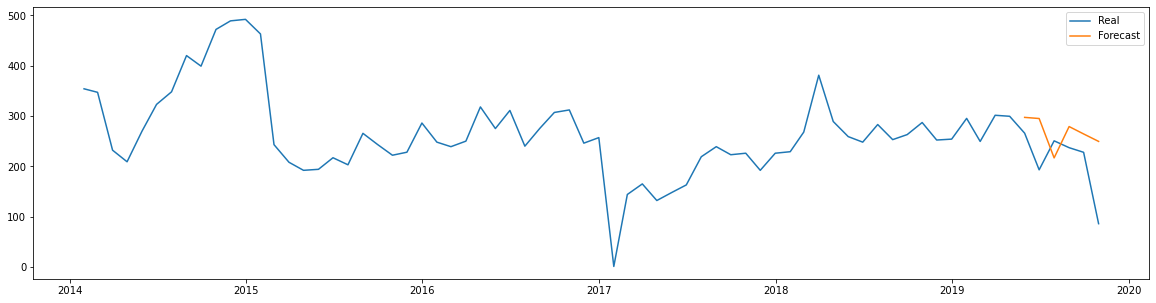

In [144]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [145]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

84.01916004432339


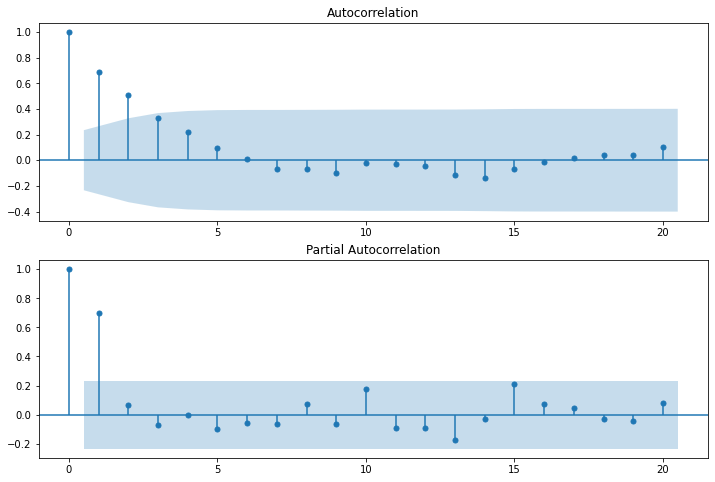

In [133]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N05B"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N05B"],lags=20,ax=ax2)

##### p = 0, 1 ; q = 0, 1, 2

In [160]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                   N05B   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                -376.537
Method:                       css-mle   S.D. of innovations             56.413
Date:                Mon, 24 May 2021   AIC                            759.073
Time:                        22:32:11   BIC                            765.776
Sample:                    01-31-2014   HQIC                           761.732
                         - 09-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        266.5338     23.835     11.183      0.000     219.819     313.249
ar.L1.N05B     0.7253      0.081      8.905      0.000       0.566       0.885
                                    Roots           

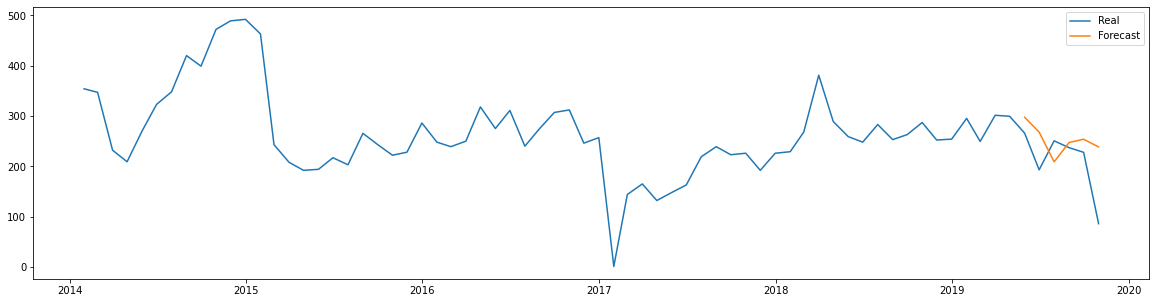

In [157]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [158]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

73.48400380643385


In [9]:
stepwise_fit = auto_arima(data['N05B'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf',seasonal=True,max_P=2,max_D=1,max_Q=2,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=771.523, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=770.744, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=771.752, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=771.179, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=769.009, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=771.309, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=770.469, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=771.195, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=771.185, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.738 seconds


In [8]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

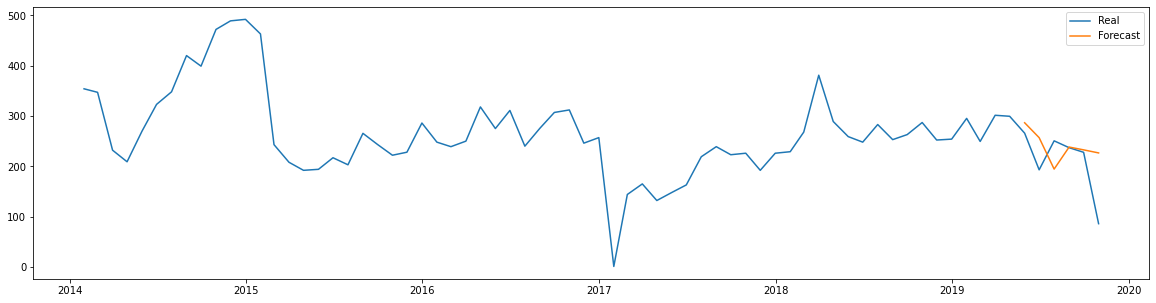

In [9]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [10]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

67.64553997687366


## N05C

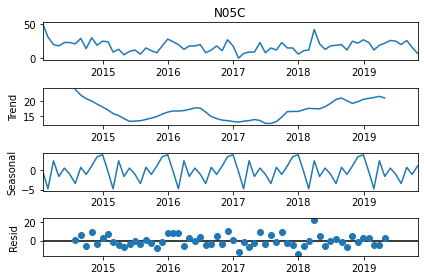

In [99]:
decompose_result = seasonal_decompose(data["N05C"],model='additive')
decompose_result.plot();

In [11]:
df = data.loc[:,['N05C']]
train = df[:-6]
test = df[-6:]

In [147]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

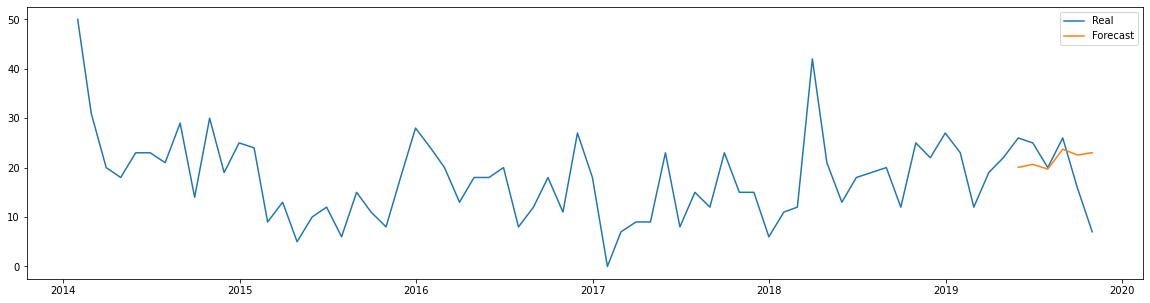

In [148]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [149]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.731820266420514


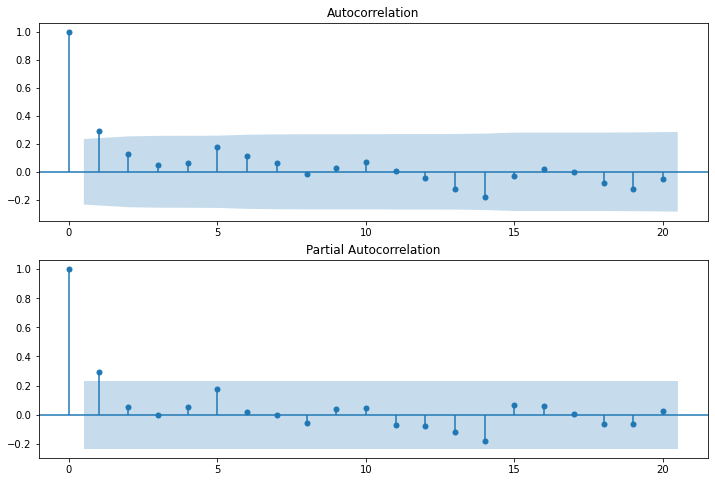

In [162]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["N05C"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["N05C"],lags=20,ax=ax2)

##### p = 0, 1 ; q = 0, 1

In [180]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                   N05C   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                -240.613
Method:                       css-mle   S.D. of innovations              7.902
Date:                Mon, 24 May 2021   AIC                            487.226
Time:                        22:45:40   BIC                            493.928
Sample:                    01-31-2014   HQIC                           489.885
                         - 09-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2492      1.499     12.173      0.000      15.311      21.187
ar.L1.N05C     0.3682      0.127      2.909      0.004       0.120       0.616
                                    Roots           

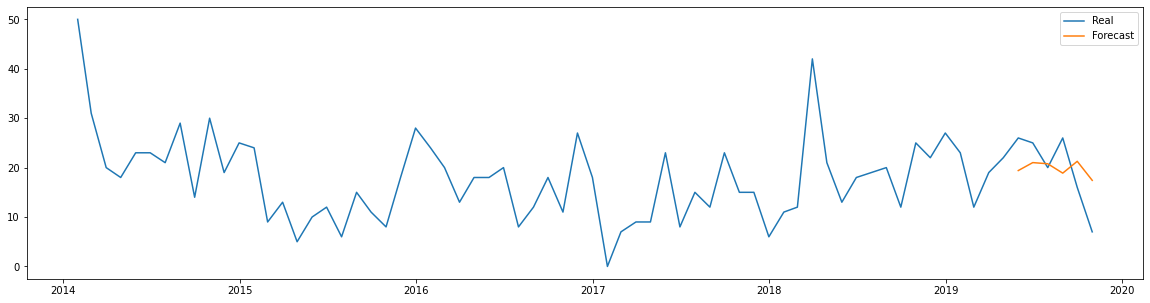

In [181]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [182]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.417134291089867


In [6]:
stepwise_fit = auto_arima(data['N05C'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=499.320, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=506.300, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=500.982, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=493.536, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=504.615, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=491.557, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=493.539, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=495.512, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=491.810, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=491.932, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=499.050, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=493.808, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=490.142, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=492.128, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12]         

In [12]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

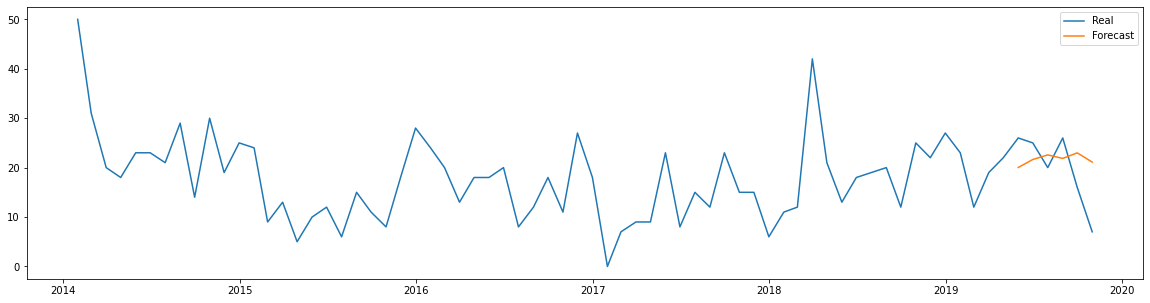

In [13]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [14]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

7.287307235083719


## R03

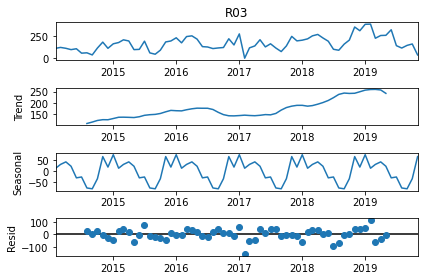

In [106]:
decompose_result = seasonal_decompose(data["R03"],model='additive')
decompose_result.plot();

In [43]:
df = data.loc[:,['R03']]
train = df[:-6]
test = df[-6:]

In [41]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

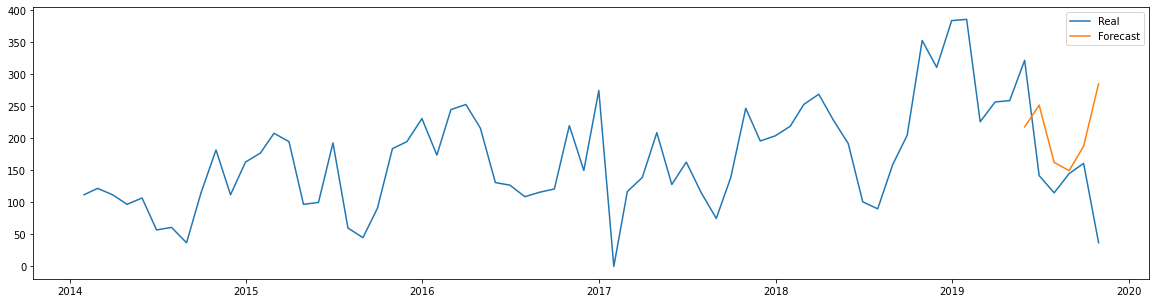

In [42]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [110]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

125.82273001119184


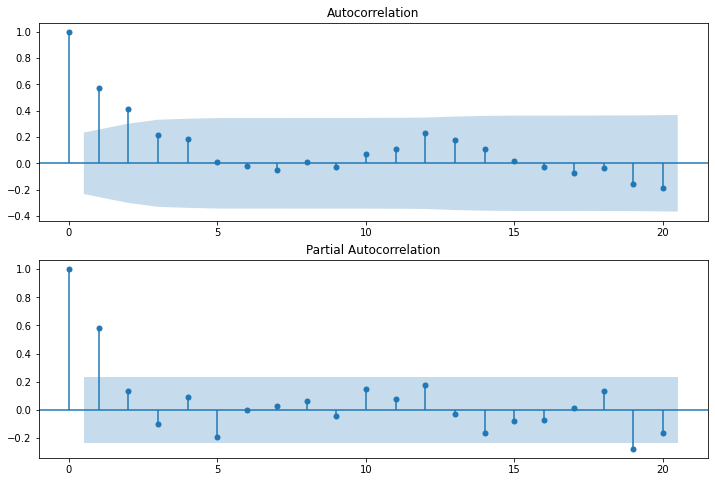

In [210]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["R03"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["R03"],lags=20,ax=ax2)

##### p = 0, 1 ; q = 0, 1, 2

In [44]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(1,0,0))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(1,0,0))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                              ARMA Model Results                              
Dep. Variable:                    R03   No. Observations:                   69
Model:                     ARMA(1, 0)   Log Likelihood                -385.542
Method:                       css-mle   S.D. of innovations             64.427
Date:                Thu, 27 May 2021   AIC                            777.084
Time:                        08:41:15   BIC                            783.786
Sample:                    01-31-2014   HQIC                           779.743
                         - 09-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.2458     18.526      9.082      0.000     131.935     204.556
ar.L1.R03      0.5896      0.096      6.164      0.000       0.402       0.777
                                    Roots           

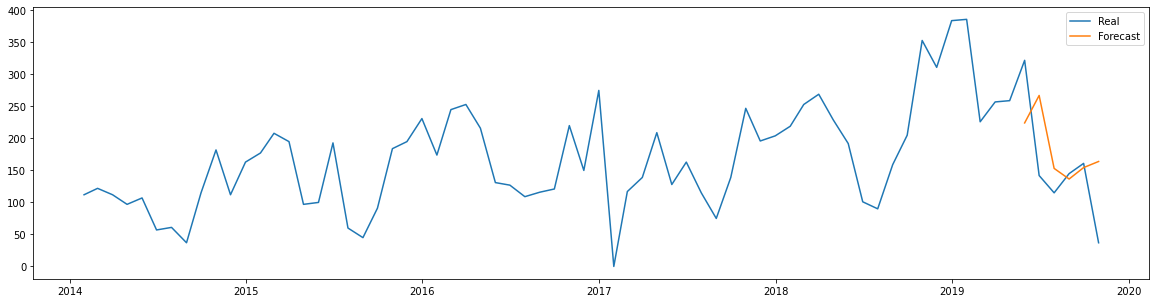

In [45]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [46]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

84.5701175653291


In [11]:
stepwise_fit = auto_arima(data['R03'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf',seasonal=True,max_P=2,max_D=1,max_Q=2,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=816.501, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=818.188, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=789.563, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=799.912, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=932.477, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=791.028, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=791.559, Time=0.92 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=791.559, Time=0.54 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=789.733, Time=0.21 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=793.562, Time=0.72 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=814.278, Time=0.26 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=790.605, Time=0.44 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=790.788, Time=0.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=799.773, Time=0.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercep

In [17]:
stepwise_fit = auto_arima(data['R03'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=794.675, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=818.188, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=789.563, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=799.912, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=932.477, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=791.028, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=791.559, Time=0.28 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=791.559, Time=0.23 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=789.733, Time=0.06 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=793.562, Time=0.27 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=814.278, Time=0.08 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=790.605, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=790.788, Time=0.15 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=799.773, Time=0.13 sec
 ARIMA(2,0,1)(1,0,0)[12] intercep

In [15]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

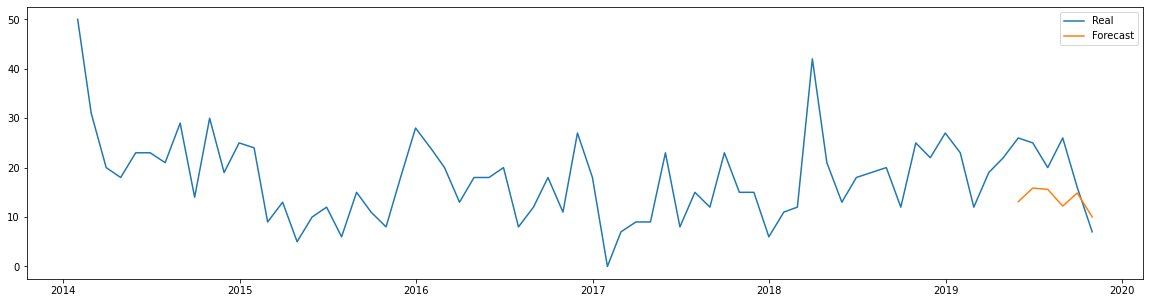

In [16]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

## R06

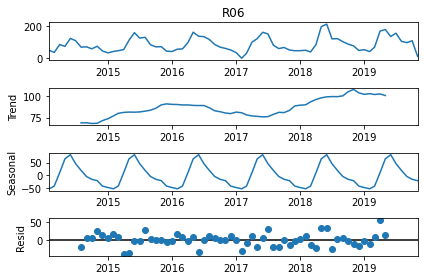

In [111]:
decompose_result = seasonal_decompose(data["R06"],model='additive')
decompose_result.plot();

In [68]:
df = data.loc[:,['R06']]
train = df[:-6]
test = df[-6:]

In [48]:
rolling_predictions = test.copy()
predict = []
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ExponentialSmoothing(train,seasonal_periods=12,seasonal='add').fit()
    pred = model.forecast(1)
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

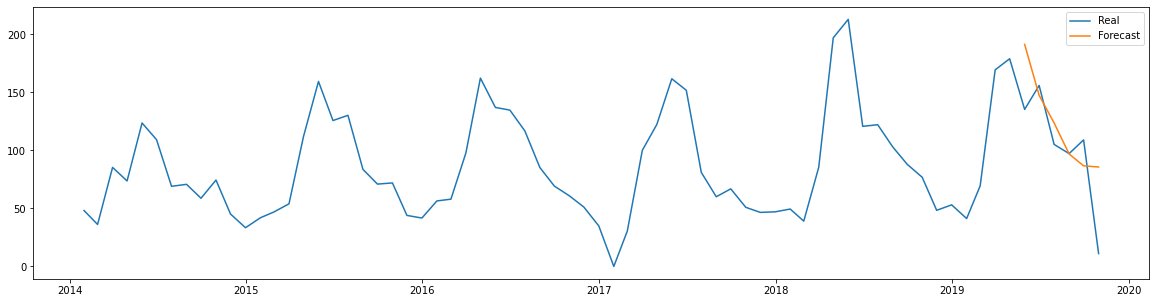

In [49]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [50]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

40.03843134746325


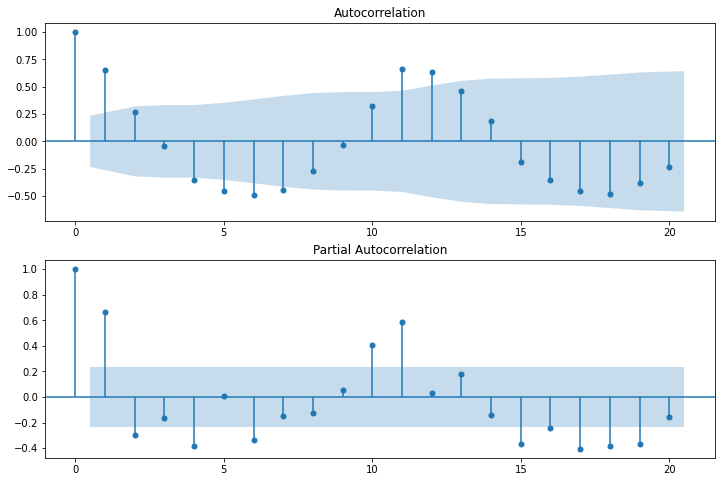

In [209]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["R06"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["R06"],lags=20,ax=ax2)

##### p = 0, 1, 2 ; q = 0, 1

In [69]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
model = ARIMA(train,order=(2,1,1))
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = ARIMA(train,order=(2,1,1))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
print(model.summary())
predictions = pd.DataFrame(predict,index=test.index)

                             ARIMA Model Results                              
Dep. Variable:                  D.R06   No. Observations:                   68
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -328.126
Method:                       css-mle   S.D. of innovations             29.386
Date:                Thu, 27 May 2021   AIC                            666.253
Time:                        09:13:35   BIC                            677.350
Sample:                    02-28-2014   HQIC                           670.650
                         - 09-30-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5983      0.401      1.492      0.136      -0.188       1.384
ar.L1.D.R06     0.9478      0.110      8.584      0.000       0.731       1.164
ar.L2.D.R06    -0.3829      0.110     -3.482    

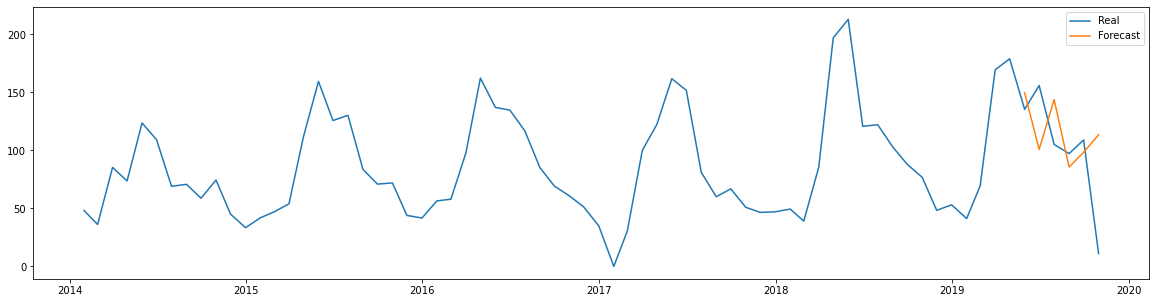

In [70]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [71]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

50.77266686837004


In [12]:
stepwise_fit = auto_arima(data['R06'],trace = True,suppress_warnings=True,start_p=0,max_p=2,start_q=0,max_q=2,test='adf',seasonal=True,max_P=2,max_D=1,max_Q=2,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=569.371, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=590.878, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=568.253, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=551.396, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=564.493, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=550.739, Time=0.63 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=551.238, Time=0.34 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=566.283, Time=0.68

In [18]:
stepwise_fit = auto_arima(data['R06'],trace = True,suppress_warnings=True,test='adf',seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=590.878, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=568.253, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=551.396, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=564.493, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=550.739, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=551.238, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=569.371, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=0.50 sec

In [19]:
rolling_predictions = test.copy()
predict = []
start = len(train)
end = start + 1
for train_end in test.index:
    
    train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train,order=(0,1,1),seasonal_order=(1,1,1,12))
    model = model.fit()
    pred = model.predict(start = start,end = end-1,typ='levels')
    start = end
    end = start + 1
    predict.append(pred[0])
    rolling_predictions[train_end] = pred
predictions = pd.DataFrame(predict,index=test.index)

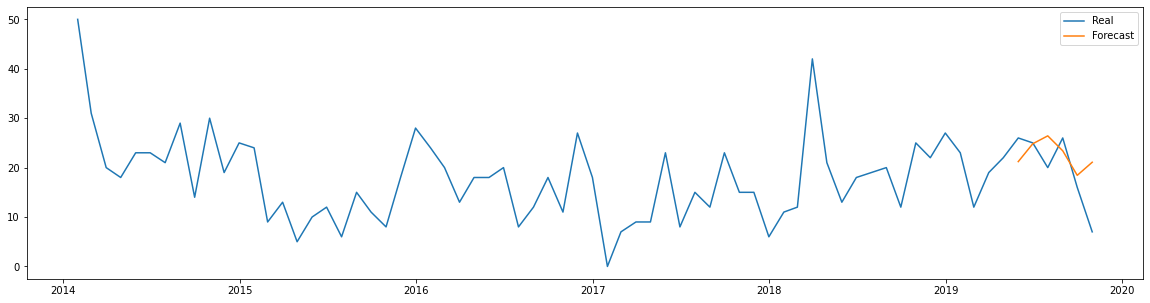

In [20]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [21]:
rmse = math.sqrt(mean_squared_error(test,predictions))
print(rmse)

6.773935644400683
